### Revisión de la integridad de los datos Sector III

Esta zona es opuesta a las dos anteriores. Es casi en su totalidad comercial, con alto tránsito de peatones, vehículos y transportes públicos, pero orientada al comercio. Tiene poca presencia de vecinos y ninguna de fábricas, teniendo su propio microclima delictual.

-----------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'delitos_csv/delitos_zona_iii_ubicacion.csv'
df = pd.read_csv(file_path, delimiter=',')

print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
      nombre  robo a mano armada  robo de vehiculos  robo piraña  \
0  denuncia1                   1                  0            0   
1  denuncia2                   1                  0            2   
2  denuncia3                   0                  0            2   
3  denuncia4                   2                  0            0   
4  denuncia5                   0                  0            2   

   lesiones leves  robo  lesiones graves  hurto  vandalismo       fecha  \
0               0     0                0      0           0  07/06/2018   
1               0     2                0      0           0  18/11/2017   
2               0     2                0      0           0  06/02/2013   
3               0     2                0      0           0  21/09/2010   
4               0     0                0      0           0  12/12/2016   

     latitud   longitud  
0 -31.451594 -64.243008  
1 -31.449993 -64.249485  
2 -31.451573 -64.246356  
3 -31.

In [2]:
nan_null_conteo = df.isnull().sum()
print("Conteo de valores NaN o null por columna:")
print(nan_null_conteo)

columnas_todo_cero = [col for col in df.columns if (df[col] == 0).all()]
print("\nColumnas con todos los valores en 0:")
print(columnas_todo_cero)

Conteo de valores NaN o null por columna:
nombre                0
robo a mano armada    0
robo de vehiculos     0
robo piraña           0
lesiones leves        0
robo                  0
lesiones graves       0
hurto                 0
vandalismo            0
fecha                 0
latitud               0
longitud              0
dtype: int64

Columnas con todos los valores en 0:
['robo de vehiculos', 'lesiones leves', 'lesiones graves', 'hurto', 'vandalismo']


-----------------------------------------------------------------------------------------------------------------------

Aunque parezca repetitivo, en este tipo de zonas es imperativo señalar que sería extremadamente raro y casi imposible la falta de delitos, si se desea realizar una investigación real o recrear la investigación criminal original que condujo a este resumen, es necesario estar atento a esto; si bien todas las entrevistas arrojarán delitos o no serán utilizadas, la falta de datos implicaría una brecha sumamente seria que debe despertar todas las alarmas.

-----------------------------------------------------------------------------------------------------------------------

In [3]:
columnas_a_excluir = ['nombre', 'fecha', 'latitud', 'longitud']
columnas_a_considerar = [col for col in df.columns if col not in columnas_a_excluir]

columnas_con_datos_no_cero = [col for col in columnas_a_considerar if (df[col] != 0).any()]

df_con_datos_no_cero = df[columnas_con_datos_no_cero]

estadisticas_descriptivas = df_con_datos_no_cero.describe(include='all')

print("\nEstadísticas descriptivas de las columnas con valores distintos de cero:")
print(estadisticas_descriptivas)


Estadísticas descriptivas de las columnas con valores distintos de cero:
       robo a mano armada  robo piraña        robo
count          400.000000    400.00000  400.000000
mean             1.012500      0.96500    1.102500
std              0.808689      0.82491    0.814649
min              0.000000      0.00000    0.000000
25%              0.000000      0.00000    0.000000
50%              1.000000      1.00000    1.000000
75%              2.000000      2.00000    2.000000
max              2.000000      2.00000    2.000000


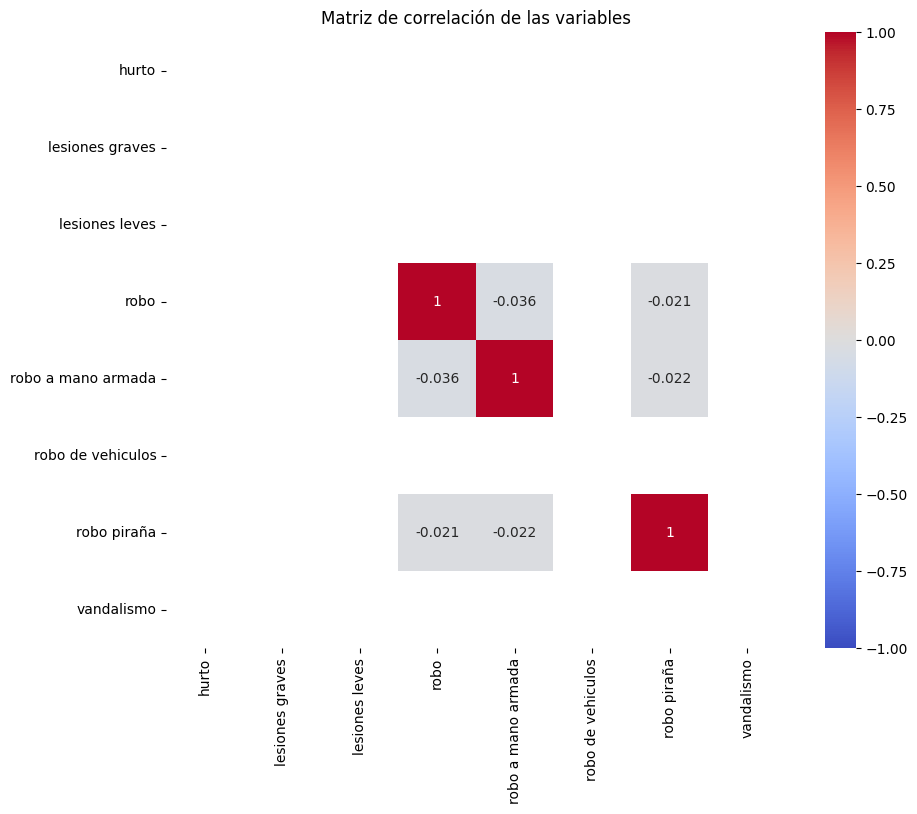

In [4]:
columnas_de_interes = df.columns.difference(['nombre', 'fecha', 'latitud', 'longitud'])
df_filtrado = df[columnas_de_interes]

matriz_de_correlacion = df_filtrado.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de las variables')
plt.show()


-----------------------------------------------------------------------------------------------------------------------

Ahora, aunque pueda ser contraintuitivo, observamos la falta de diversidad de delitos y la concentración en aquellos que implican golpear específicamente a un objetivo de interés. Siendo esta una zona comercial, los objetivos son tanto los comerciantes como los clientes y/o proveedores. El foco se coloca en ataques rápidos, ya que las personas no suelen permanecer mucho tiempo en esa zona y, además, no suelen llevar consigo todo su dinero y/o propiedades durante mucho tiempo. El uso de grupos y armas acelera el abordaje y la ejecución del delito.

-----------------------------------------------------------------------------------------------------------------------

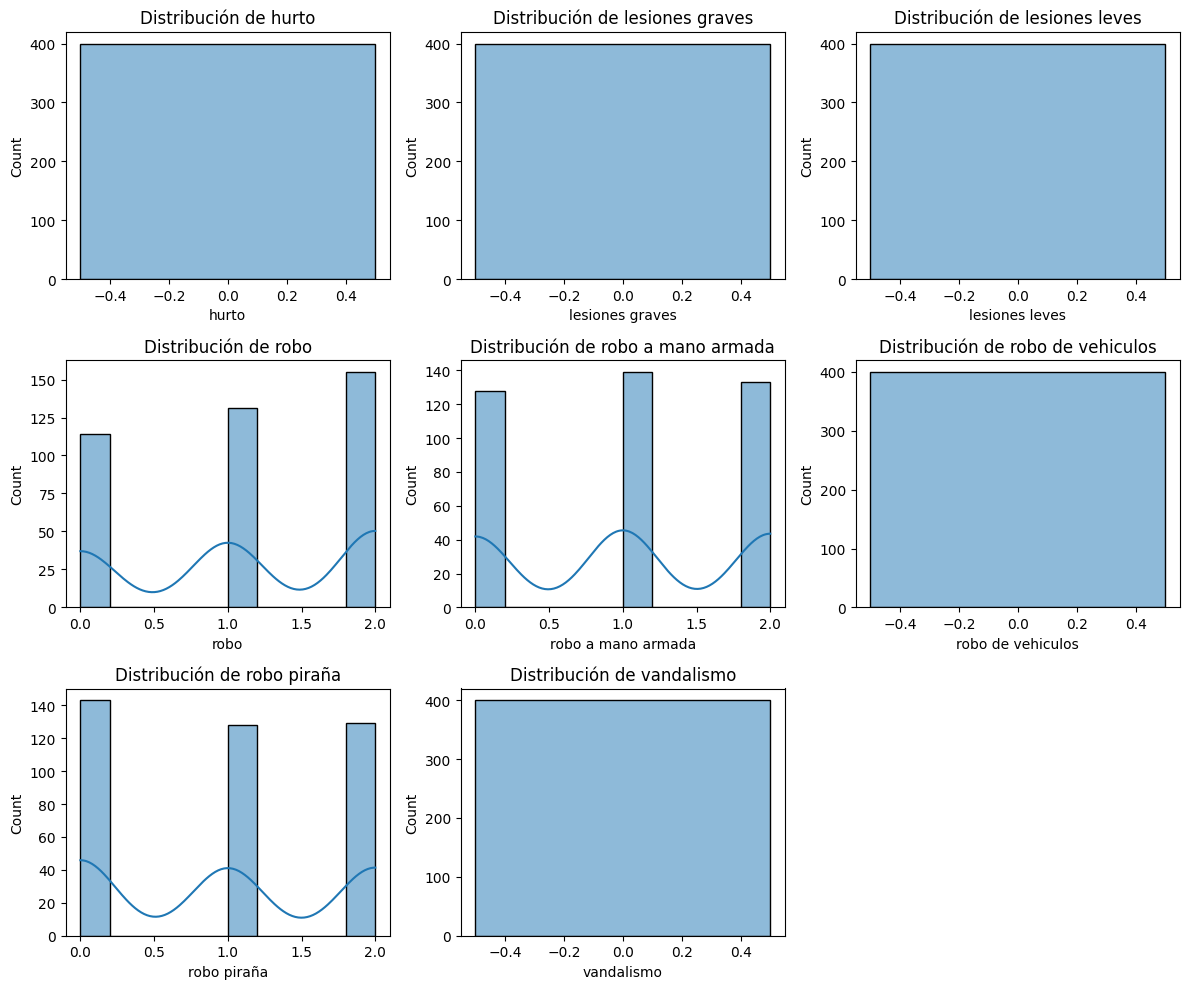

In [5]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(columnas_de_interes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------------------------------------------------

No hay una relación directa entre los delitos en sí; estos ocurren en función de la "oferta" de víctimas. Esta zona, como se señaló, es comercial y también cuenta con escuelas y paradas de transporte público. La clave está en la relación víctima-delito, que por ser parte esencial del sumario judicial no puedo exponer en detalle. Sin embargo, las grandes concentraciones de personas, especialmente si son personas indefensas como niños o ancianos, se ven más afectadas por estos ataques armados o en grupo. Esto permite a los delincuentes adquirir más bienes sustraídos en menos tiempo. A diferencia de lo que se podría suponer normalmente, donde las armas se utilizan como herramienta para aumentar las capacidades ofensivas por encima de la víctima, aquí se observa una relación inversamente proporcional en ese sentido.

-----------------------------------------------------------------------------------------------------------------------

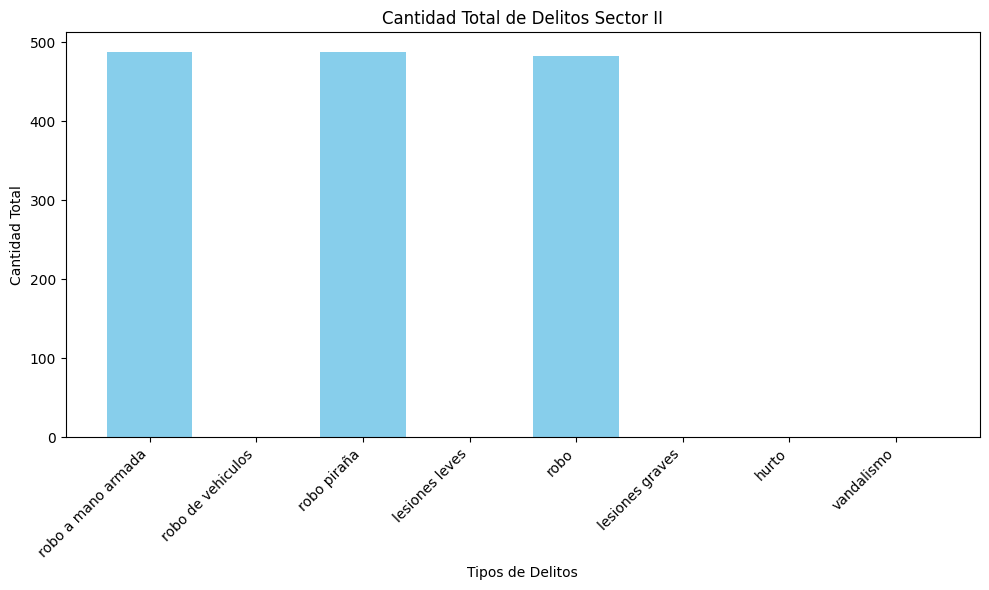

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("delitos_csv/delitos_zona_iii.csv")


sumas_delitos = df.iloc[:, 1:-1].sum()


nombres_delitos = df.columns[1:-1]


plt.figure(figsize=(10, 6))
plt.bar(nombres_delitos, sumas_delitos, color="skyblue")
plt.xlabel("Tipos de Delitos")
plt.ylabel("Cantidad Total")
plt.title("Cantidad Total de Delitos Sector II")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()

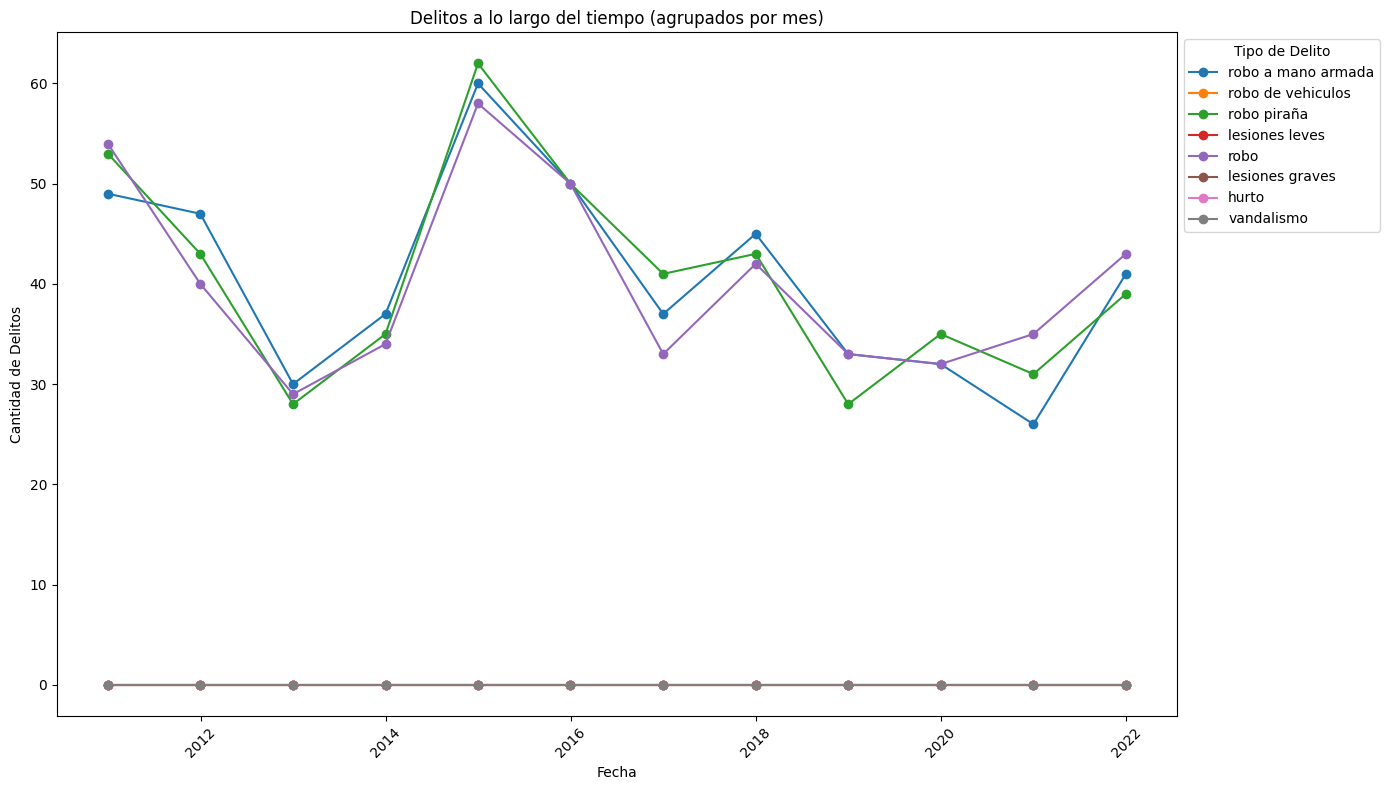

In [7]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

df = df.drop(columns=['name'])

delitos_por_mes = df.groupby(pd.Grouper(key='fecha', freq='Y')).sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

for columna in delitos_por_mes.columns[1:]:
    ax.plot(delitos_por_mes['fecha'], delitos_por_mes[columna], marker='o', label=columna)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Delitos')
ax.set_title('Delitos a lo largo del tiempo (agrupados por mes)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tipo de Delito')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

-----------------------------------------------------------------------------------------------------------------------

Nuevamente observamos la fluctuación en cómo afecta o se da este cambio entre los momentos en que se aplicaron las correspondientes estrategias y cuando no. Es importante recordar que los datos son recopilados posteriormente a los eventos; por lo tanto, la fecha refleja la entrevista y no necesariamente cuando ocurrió el evento. Para precisión temporal, se utilizan los datos de la fiscalía, los cuales apuntan a la investigación criminal, siendo esta una parte dentro de esta investigación.

-----------------------------------------------------------------------------------------------------------------------